# Introduction to MLP in Python

## MLP vs. Deep Learning

A python library such as `scikit-learn` is not dedicated to Deep Learning. Nevertheless, `scikit-learn` provides some modules to train shallow neural networks. On the contrary, some Python libraries:  `tensorflow`, `pytorch` for example, have been designed for Deep Learning but also enable to train and other models (linear models, SVM, gradient boosting) at the cost of less flexibility . Even if Deep Learning libraries provide Python APIs, some features and small modifications may not be straightforward because the source code is in C++. In this notebook, we focus on `scikit-learn`, the Deep Learning frameworks are presented in another notebook.

## First MLP version for classification

### First course example



In [1]:
from sklearn import metrics, datasets

In [2]:
from sklearn.neural_network import MLPClassifier

In [3]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
iris = sns.load_dataset('iris')

Data description

In [5]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


There are 4 input variables and 1 class

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Plot with seaborn

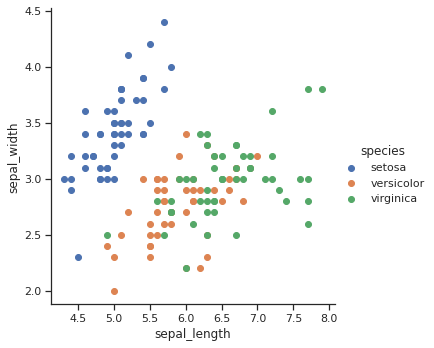

In [8]:
sns.FacetGrid(iris, hue="species",height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

Other coordinates visualization

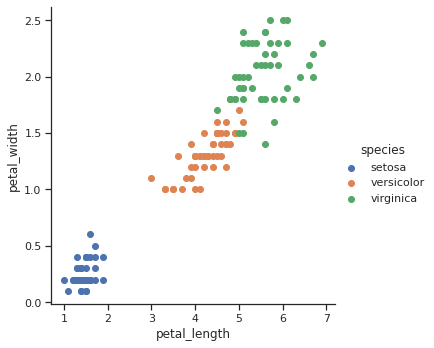

In [9]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

Pairplot with pandas and seaborn

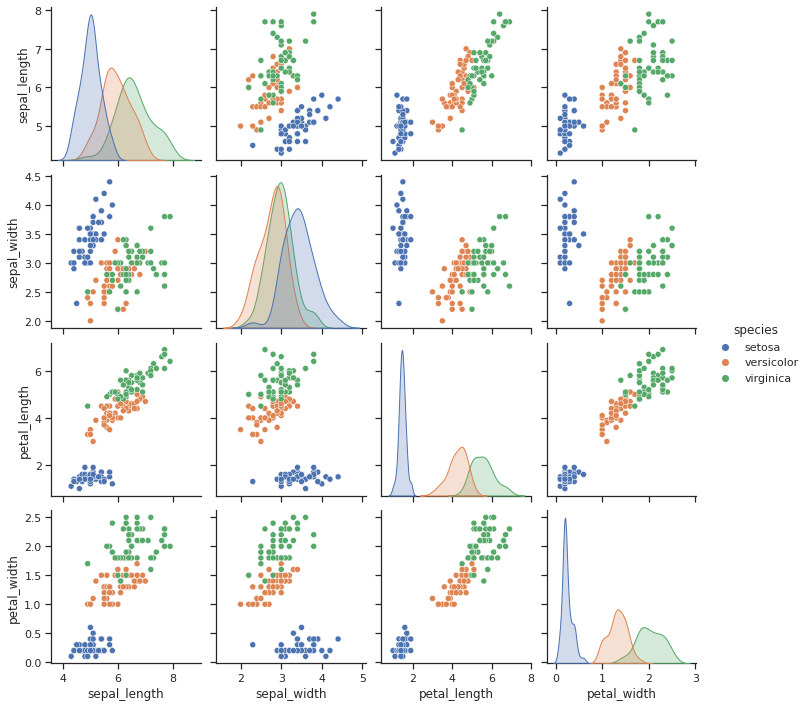

In [10]:
sns.pairplot(iris, hue="species")

We start by splitting the data into a learning base and a test base. NB: the test base is to be forgotten during the whole construction of the model, it will only be called at the very end, once the final model is trained. These data correspond to what our predictive model in production would have as inputs.

In [11]:
from sklearn.model_selection import train_test_split

This function is quite simple, you can specify either a number or a percent of data

In [12]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [13]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.50)

Let's build a MLP for data classification with 2 hidden neurons and a weight decay penalization of 0.01

In [14]:
mlp_iris=MLPClassifier(solver='lbfgs', alpha=0.01, hidden_layer_sizes=(2,), random_state=1, max_iter=1000)

In [15]:
mlp_iris.fit(X_train,y_train)

MLPClassifier(alpha=0.01, hidden_layer_sizes=(2,), max_iter=1000,
              random_state=1, solver='lbfgs')

Now we use 'predict' to perform the prediction on test data

In [16]:
y_pred=mlp_iris.predict(X_test)

Confusion matrix

In [17]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[21  0  0]
 [ 0 23  1]
 [ 0  4 26]]


**Exercise** : Try with only 25 training data and without weights penalization 

## First MLP for regression

## Second course example

In [18]:
from math import *

In [19]:
import numpy as np

In [20]:
from sklearn.neural_network import MLPRegressor

We define the function f1

In [21]:
def f1(x):
    x1=x[:,0]
    x2=x[:,1]
    x3=x[:,2]
    return np.sin(x1)/x1+0.1*x3**4+2*np.sin(x2)**2

The input data follow a uniform law between - Pi and Pi

In [22]:
x=np.random.uniform(-pi,pi,450)

In [23]:
x=np.reshape(x,(150,3))

In [24]:
y=f1(x)

In [25]:
from sklearn.model_selection import train_test_split

We split the 150 input data and only keep 1/4 in the  test dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

We define a MLP instance

In [27]:
nnet=MLPRegressor(hidden_layer_sizes=(11,),max_iter=10000,activation='tanh',alpha=0.01,solver='lbfgs')

Training with 'fit'

In [28]:
nnet.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(11,),
             max_iter=10000, solver='lbfgs')

Prediction

In [29]:
y_pred=nnet.predict(X_test)

Visualization

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ldexp', 'e', 'nan', 'sinh', 'log', 'cosh', 'isnan', 'exp', 'log1p', 'remainder', 'hypot', 'gcd', 'degrees', 'cos', 'log10', 'log2', 'sin', 'frexp', 'tan', 'radians', 'cm', 'fabs', 'trunc', 'expm1', 'tanh', 'isfinite', 'isinf', 'isclose', 'gamma', 'ceil', 'fmod', 'copysign', 'floor', 'inf', 'modf', 'pi', 'sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


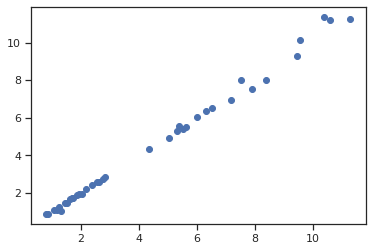

In [31]:
plt.plot(y_pred, y_test,'o')

Estimation of coeeficients R2 and RMSE

In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
r2_score(y_test,y_pred)

0.993769441629449

In [34]:
mean_squared_error(y_test,y_pred)

0.06594869660276892

Cross validation

In [35]:
from sklearn.model_selection import KFold, cross_val_score

In [36]:
kf = KFold(n_splits=5, shuffle=True)

In [37]:
 print(cross_val_score(nnet, x, y, cv=kf))  

[0.99797349 0.9979589  0.9995704  0.99418741 0.99926224]


2 hidden neurons - decay 0.01

In [38]:
nnet=MLPRegressor(hidden_layer_sizes=(2,),max_iter=1000,activation='tanh',alpha=0.01,solver='lbfgs')

In [39]:
nnet.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=0.01, hidden_layer_sizes=(2,),
             max_iter=1000, solver='lbfgs')

In [40]:
y_pred=nnet.predict(X_test)

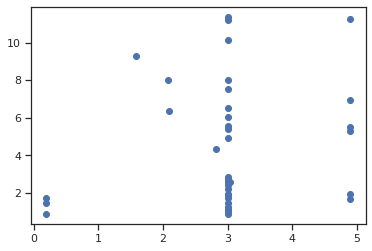

In [41]:
plt.plot(y_pred, y_test,'o')

In [42]:
r2_score(y_test,y_pred)

-0.19648478156610083

In [43]:
mean_squared_error(y_test,y_pred)

12.664452711379615

**Exercise** : Try without penalization and with different numbers of hidden neurons 

Cross validation to find the best hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` enables to perform cross validation without having to write all the steps - Warning: here lots of hyperparameters are considered and it's long, even if the maximum step should be larger in order to reach convergence

In [45]:
parameter_list = {
    'hidden_layer_sizes': [(2,),(6,),(8,),(10,),(12,),(14,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.005,0.01,0.05,0.1],
    'learning_rate': ['constant','adaptive'],
}
mlp=MLPRegressor(max_iter=10000)
gridCV = GridSearchCV(estimator=mlp, param_grid=parameter_list,cv=5)


In [ ]:
gridCV.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REAC

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=10000),
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.005, 0.01, 0.05, 0.1],
                         'hidden_layer_sizes': [(2,), (6,), (8,), (10,), (12,),
                                                (14,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam', 'lbfgs']})

Best hyperparameters

In [ ]:
print('Best parameters found:\n', gridCV.best_params_)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (14,), 'learning_rate': 'constant', 'solver': 'lbfgs'}


Set of all results

In [ ]:
means = gridCV.cv_results_['mean_test_score']
stds = gridCV.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gridCV.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

-0.033 (+/-0.559) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'sgd'}
-0.185 (+/-0.360) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'adam'}
0.180 (+/-1.094) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
-0.052 (+/-0.864) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
-0.146 (+/-0.489) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.138 (+/-1.331) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (2,), 'learning_rate': 'adaptive', 'solver': 'lbfgs'}
0.199 (+/-1.147) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (6,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.219 (+/-0.816) for {'activation': 'tanh', '

# Focus on MNIST dataset

In [46]:
import numpy as np 
import matplotlib.pyplot as plt

We import data

In [47]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X=X/255.

In [48]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Data shape

In [49]:
print("Image Data Shape" , X.shape)

Image Data Shape (70000, 784)


In [50]:
print("Label Data Shape", y.shape)

Label Data Shape (70000,)


Data are 28 by 28 images

We look at on image

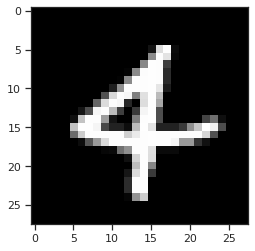

In [51]:
plt.figure()
image=X.iloc[150]
plt.imshow(np.reshape(np.array(image), (28,28)), cmap=plt.cm.gray)


In [ ]:
print(y[0:20])

0     5
1     0
2     4
3     1
4     9
5     2
6     1
7     3
8     1
9     4
10    3
11    5
12    3
13    6
14    1
15    7
16    2
17    8
18    6
19    9
Name: class, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


### Now we build and train a MLP

In [52]:
from sklearn.neural_network import MLPClassifier

In [53]:
classif = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(256,), random_state=1, alpha=0.005)

In [54]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

In [55]:
classif.fit(X_train, y_train)   

MLPClassifier(alpha=0.005, hidden_layer_sizes=(256,), random_state=1,
              solver='lbfgs')

In [56]:
y_pred = classif.predict(X_test)

In [57]:
print('Test accuracy:', classif.score(X_test, y_test))

Test accuracy: 0.9774


In [58]:
from sklearn import metrics

In [59]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 970    0    2    0    0    1    3    0    2    2]
 [   0 1124    2    1    0    1    2    1    4    0]
 [   2    0 1006    2    1    0    5    5   11    0]
 [   2    0    4  986    0    4    0    3    5    6]
 [   0    0    4    0  958    1    4    2    0   13]
 [   1    0    0   13    1  866    3    2    3    3]
 [   4    3    2    1    5    3  935    2    3    0]
 [   1    4    6    6    2    0    0  997    6    6]
 [   4    0    2    5    4    1    1    3  950    4]
 [   1    2    1    2    8    5    1    6    1  982]]


**Very simple MLP with Keras**

In [60]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation

In [61]:
def MLP_keras():
    
    model = keras.models.Sequential()
    model.add(keras.layers.Input(((784,)), name="InputLayer"))
    model.add(keras.layers.Dense(350, activation='relu', name='Dense_n1'))
    model.add(keras.layers.Dense(100, activation='relu', name='Dense_n2'))
    model.add(keras.layers.Dense(10, activation='softmax',name='Output'))
    
    model.compile(optimizer = 'adam',
                  loss      = 'categorical_crossentropy',
                  metrics   = ['accuracy'] )
    return model

In [62]:
model=MLP_keras()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_n1 (Dense)            (None, 350)               274750    
                                                                 
 Dense_n2 (Dense)            (None, 100)               35100     
                                                                 
 Output (Dense)              (None, 10)                1010      
                                                                 
Total params: 310,860
Trainable params: 310,860
Non-trainable params: 0
_________________________________________________________________


In [63]:
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [64]:

entrainement = model.fit(X_train,y_train_one_hot)

1875/1875 [==============================] - 10s 5ms/step - loss: 0.1995 - accuracy: 0.9408


In [65]:
loss, acc = model.evaluate(X_test, tf.keras.utils.to_categorical(y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.0966 - accuracy: 0.9691


In [66]:
y_pred1 = model.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [67]:
cm = metrics.confusion_matrix(y_test.astype('int'), np.argmax(y_pred1,axis=1))
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[ 969    0    0    0    0    1    3    2    5    0]
 [   0 1115    2    2    0    0    2    1   13    0]
 [   6    2  986    6    1    0    4    7   20    0]
 [   0    0    5  991    0    0    0    6    7    1]
 [   3    0    4    0  951    0    4    0    7   13]
 [   4    0    0   22    1  847    7    2    9    0]
 [   4    3    0    0    7    5  933    0    6    0]
 [   1    6    7    6    1    0    0  996    6    5]
 [   3    0    2   11    3    0    2    4  946    3]
 [   3    3    0   11   12    3    1    8   11  957]]


A pandas Dataframe for visualization

In [68]:
import pandas as pd

In [69]:
feat_cols = [ 'pixel'+str(i+1) for i in range(X_test.shape[1]) ]

In [70]:
df = pd.DataFrame(X_test,columns=feat_cols)

In [71]:
df['labels'] = y_test

In [72]:
df['labels'] = df['labels'].apply(lambda i: str(i))

In [73]:
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (10000, 785)


### PCA Visualization

In [74]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA(n_components=3)

In [76]:
pca_result = pca.fit_transform(df[feat_cols].values)

In [77]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]

Explained variance

In [78]:
pca.explained_variance_ratio_

array([0.10047663, 0.07544487, 0.06140516])

Visualization on the 2 first components

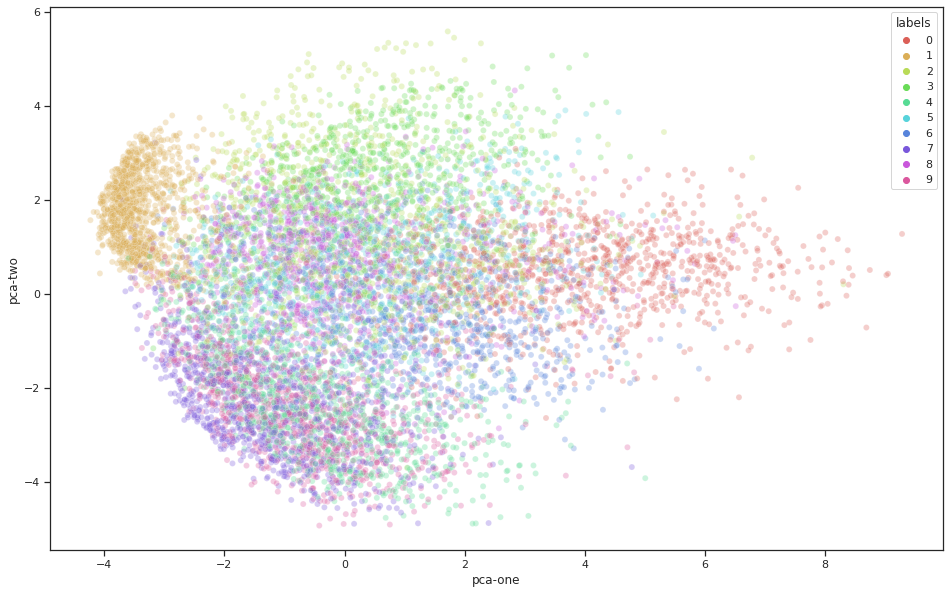

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)

### Visualization with t-SNE

The t-SNE (t Distributed Stochastic Neighbor Embedding) method is a very powerful method for 2D visualization of high dimensional data.  It is a non-linear dimension reduction method that preserves the similarities between individuals: two similar individuals in the original space are represented by close points in 2D, and two individuals of low similarity by distant points. 
It breaks down in 2 steps:
- First, we construct a probability law on the pairs of individuals ($x_i,x_j$) in the original space, which favors similar individuals:	
$$p_{j|i}=\frac{exp(-\frac{\|x_i-x_j\|^2}{2\sigma_i^2})}{\sum_{k \neq i}exp(-\frac{\|x_i-x_k\|^2}{2\sigma_i^2})}  $$ 
$$ p_{ij}=\frac{p_{j|i}+p_{i|j}}{2n} $$ 
 
with N the number of individuals and $σ_i$ the variance of the Gaussian. The similarity between an individual $x_j$ and an individual $x_i$ corresponds to the conditional probability $p_{j|i}$ that $x_i$ would choose $x_j$ as its neighbor, if the neighbors were chosen proportionally to their probability density, a Gaussian centered at $x_i$.

-	We build a law on the pairs of individuals ($y_i,y_j$) in the reduced dimensional space:
$$q_{ij}=\frac{{(1+\|y_i-y_j\|^2)}^{-1}}{\sum_{k \neq l} {(1+\|y_k-y_l\|^2)}^{-1}}$$ 
 
-	The coordinates of the points yi in the 2-dimensional plane are estimated by minimizing the Kullback-Leibler divergence KL between the two distributions p and q, in order to preserve the similarities between the individuals in the 2D space.

 $$KL(p|q)=\sum_{i \neq j}p_{ij} log\frac{p_{ij}}{q_{ij}}$$

This method, which preserves similarities, and thus local structures, can also reveal information on the global structure of the data, such as division into clusters. 



In [81]:
from sklearn.manifold import TSNE

In [82]:
tsne=TSNE(n_components=2, random_state=1)

In [83]:
X_2d=tsne.fit_transform(df[feat_cols].values)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [84]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [85]:
df['tsne-1'] = X_2d[:,0]
df['tsne-2'] = X_2d[:,1]

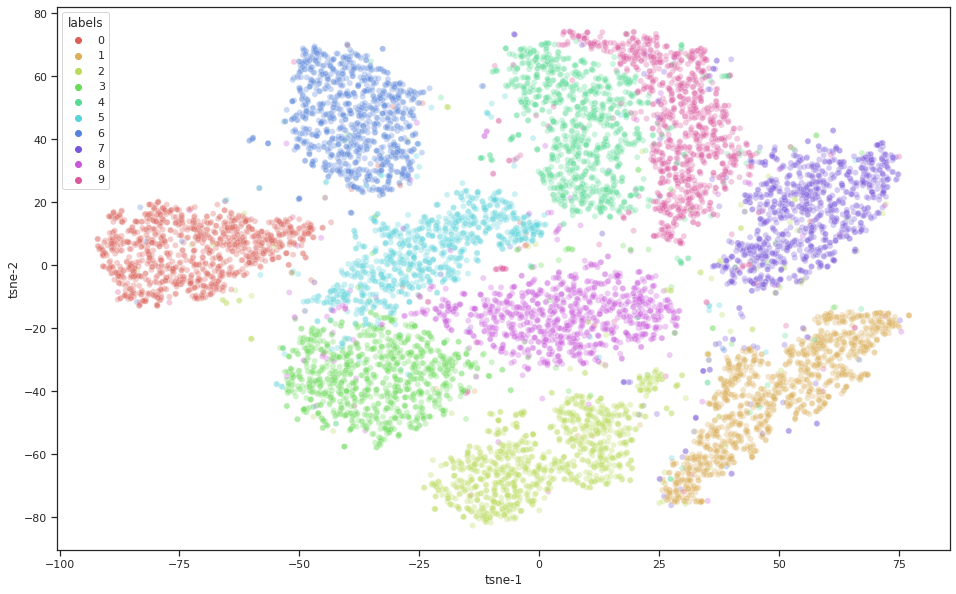

In [86]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-1", y="tsne-2",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)


Let's follow the advices and start by a PCA to decrease the dimension to 50

In [87]:
pca_50 = PCA(n_components=50)

In [88]:
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)

Explained variance by the 50 first components 

In [89]:
np.sum(pca_50.explained_variance_ratio_)

0.831573947045296

In [90]:
tsne = TSNE(n_components=2)

In [91]:
X_2dred = tsne.fit_transform(pca_result_50)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [92]:
df['tsne-1-red'] = X_2dred[:,0]
df['tsne-2-red'] = X_2dred[:,1]

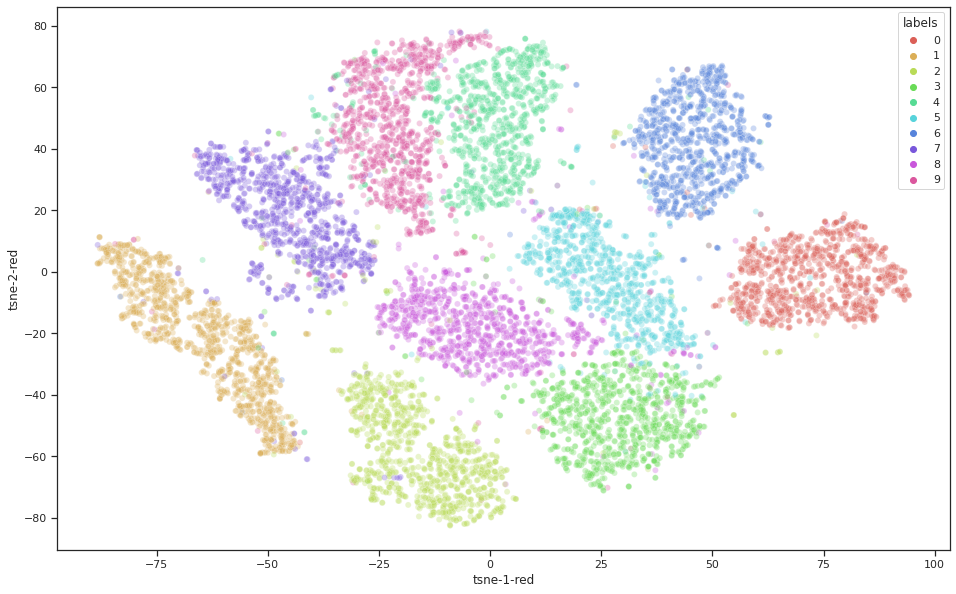

In [93]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-1-red", y="tsne-2-red",
    hue="labels",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
)